# CLUSTERING ...

QUES.1

ANS;
 | Feature               | **K-Means Clustering**                                               | **Hierarchical Clustering**                                                   |
| --------------------- | -------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Type**              | Partition-based (centroid method)                                    | Hierarchy-based (tree/dendrogram)                                             |
| **Input**             | Requires predefined number of clusters (**k**)                       | No need to specify number of clusters initially                               |
| **Approach**          | Iteratively assigns points to nearest centroid and updates centroids | Builds clusters step by step (Agglomerative = bottom-up, Divisive = top-down) |
| **Shape of Clusters** | Works best with spherical, equal-sized clusters                      | Can capture complex cluster shapes                                            |
| **Scalability**       | Efficient for large datasets                                         | Computationally expensive for large datasets                                  |
| **Interpretability**  | Provides only final clusters                                         | Provides full cluster hierarchy (dendrogram)                                  |
| **Sensitivity**       | Sensitive to outliers and initial centroid selection                 | Sensitive to distance metrics and linkage methods                             |
| **Output**            | Fixed number of clusters                                             | Tree structure (you can “cut” at different levels to choose clusters)         |
| **Use Case**          | Customer segmentation in marketing                                   | Document clustering in research/text mining                                   |


QUES.2

ANS; 🔹 What is Silhouette Score?

The Silhouette Score is a metric used to evaluate the quality of clusters created by a clustering algorithm.

It measures how well each data point fits within its cluster compared to other clusters.

Value ranges from -1 to +1.

🔹 Formula

s(i)=
max(a(i),b(i))
b(i)−a(i)

🔹 Purpose

Helps determine how well clusters are formed.

Allows comparison between different clustering algorithms (e.g., K-Means vs Hierarchical).
	​




QUES.3

ANS;
| Parameter                             | Definition                                                    | Role in Clustering                                   | Effect if Too Small                                   | Effect if Too Large                                      |
| ------------------------------------- | ------------------------------------------------------------- | ---------------------------------------------------- | ----------------------------------------------------- | -------------------------------------------------------- |
| **ε (Epsilon / Neighborhood Radius)** | Maximum distance within which points are considered neighbors | Defines the neighborhood size for density checking   | Many points labeled as noise, too many small clusters | Distinct clusters may merge into one large cluster       |
| **MinPts (Minimum Points)**           | Minimum number of points required to form a dense region      | Defines how dense a region must be to form a cluster | Even sparse regions may form clusters (less reliable) | Too many points labeled as noise, clusters may disappear |


QUES.4

ANS; : 🔹 Why Feature Scaling is Important in Clustering (K-Means & DBSCAN)
1. Distance-Based Algorithms

Both K-Means and DBSCAN rely on distance measures (usually Euclidean distance) to form clusters.

If features are on very different scales (e.g., Age: 20–60 vs Income: 20,000–200,000), the larger-scale feature (Income) dominates the distance calculation.

This makes clustering biased toward high-magnitude features.

Feature scaling ensures all variables contribute equally to distance calculations, leading to meaningful clusters.

QUES.5

ANS;
 | Step                                                  | Description                                             | Purpose                                                      |
| ----------------------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------------ |
| **1. Run K-Means for multiple k values**              | Try k = 1, 2, 3, … up to a reasonable limit             | Explore different possible cluster counts                    |
| **2. Calculate WCSS (Within-Cluster Sum of Squares)** | Measure how close points are to their cluster centroids | Lower WCSS = tighter, better clusters                        |
| **3. Plot k vs WCSS**                                 | x-axis = number of clusters (k), y-axis = WCSS          | Visualize how WCSS decreases as k increases                  |
| **4. Identify the “Elbow Point”**                     | Point where WCSS reduction slows sharply                | Represents the optimal number of clusters                    |
| **5. Choose optimal k**                               | Select k at the elbow                                   | Balances accuracy (low WCSS) and simplicity (fewer clusters) |


QUES.6

ANS;

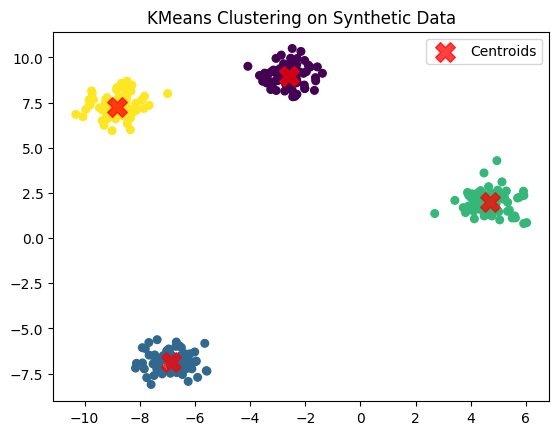

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 3. Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centroids")

plt.title("KMeans Clustering on Synthetic Data")
plt.legend()
plt.show()


QUES.7

ANS;

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
data = load_wine()
X = data.data

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)   # tune eps & min_samples if needed
labels = dbscan.fit_predict(X_scaled)

# 4. Find number of clusters (excluding noise = label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)

# Optional: count noise points
n_noise = list(labels).count(-1)
print("Number of noise points:", n_noise)


Number of clusters found (excluding noise): 0
Number of noise points: 178


QUES.8

ANS;

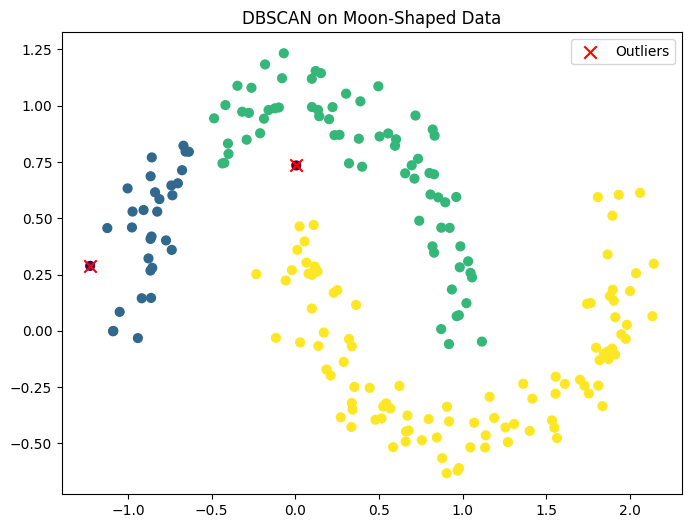

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 1. Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Plot clusters
plt.figure(figsize=(8, 6))

# Clustered points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, marker='o')

# Highlight outliers (label = -1)
outliers = (labels == -1)
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=80, marker='x', label='Outliers')

plt.title("DBSCAN on Moon-Shaped Data")
plt.legend()
plt.show()


QUES.9

ANS ;

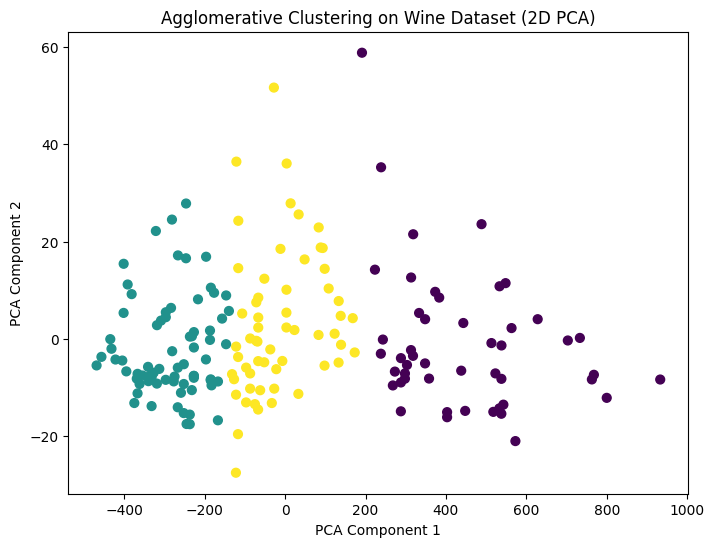

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load Wine dataset
data = load_wine()
X = data.data

# 2. Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)  # we know Wine has 3 classes
labels = agg.fit_predict(X_pca)

# 4. Visualize results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


QUES.10

ANS;
 | Step                             | Details                                                                                                                                                                                                                              | Why It Matters                                                                   |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------- |
| **Clustering Algorithm**         | - **K-Means**: scalable, interpretable.<br>- **DBSCAN**: detects outliers, no k needed.<br>- **Hierarchical**: exploratory dendrogram.                                                                                               | Choose algorithm(s) based on dataset size, shape, and need for interpretability. |
| **Data Preprocessing**           | - Handle missing values: median/mode for demographics, 0 for no purchases.<br>- Feature engineering: **RFM (Recency, Frequency, Monetary)** + category-level spend.<br>- Scaling: StandardScaler / MinMaxScaler.                     | Ensures clean, comparable inputs so distance-based algorithms work correctly.    |
| **Determine Number of Clusters** | - **Elbow Method**: WCSS vs k.<br>- **Silhouette Score**: cluster quality.<br>- **Domain validation**: clusters must be actionable for marketing.                                                                                    | Prevents too many (overfitting) or too few (underfitting) clusters.              |
| **Business Benefits**            | - **Personalized campaigns**: target offers to specific segments.<br>- **Cross-selling**: recommend complementary products.<br>- **Retention**: re-engage low-activity clusters.<br>- **Resource optimization**: efficient ad spend. | Translates clustering insights into **ROI-driven marketing actions**.            |


# THANK YOU ASSIGNMENT COMPLETED...